In [1]:
import os

In [2]:
os.listdir("/kaggle/input/yolov8m-seg_best/pytorch/default/1")

['best_yolov8_192x192_batch64.pt']

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 16.5 MB/s eta 0:00:00a 0:00:01


In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
model = YOLO('yolo11s-seg.pt') 

100%|██████████| 19.7M/19.7M [00:00<00:00, 173MB/s]


In [12]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
import torch
print(torch.cuda.device_count())  # Should return 2

2


In [14]:
model = model.to(device)

In [15]:
result = model.train(
    data='/kaggle/input/concrete-crack-dataset/config Kaggle.yaml',
    epochs=200,
    imgsz=192,
    batch=64,
    device='0,1',  # Use both GPUs
    pretrained=True,
    optimizer='SGD',
    single_cls=True,
    save_dir='runs/segment/yolov8m_train'
)

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/kaggle/input/concrete-crack-dataset/config Kaggle.yaml, epochs=200, time=None, patience=100, batch=64, imgsz=192, save=True, save_period=-1, cache=False, device=0,1, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /kaggle/input/concrete-crack-dataset/Concrete/Concrete/Images/train... 8000 images, 947 backgrounds, 0 corrupt: 100%|██████████| 8000/8000 [00:16<00:00, 480.81it/s] 


train: WARNING ⚠️ Cache directory /kaggle/input/concrete-crack-dataset/Concrete/Concrete/Images is not writeable, cache not saved.


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/concrete-crack-dataset/Concrete/Concrete/Images/val... 2000 images, 240 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:05<00:00, 391.81it/s]s]
train: Scanning /kaggle/input/concrete-crack-dataset/Concrete/Concrete/Images/train... 3518 images, 3 backgrounds, 0 corrupt:  44%|████▍     | 3518/8000 [00:08<00:16, 279.57it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/concrete-crack-dataset/Concrete/Concrete/Images is not writeable, cache not saved.


train: Scanning /kaggle/input/concrete-crack-dataset/Concrete/Concrete/Images/train... 4109 images, 8 backgrounds, 0 corrupt:  51%|█████▏    | 4109/8000 [00:10<00:10, 365.39it/s]

Plotting labels to runs/segment/train2/labels.jpg... 


train: Scanning /kaggle/input/concrete-crack-dataset/Concrete/Concrete/Images/train... 5430 images, 24 backgrounds, 0 corrupt:  68%|██████▊   | 5430/8000 [00:14<00:07, 350.49it/s]

optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)


train: Scanning /kaggle/input/concrete-crack-dataset/Concrete/Concrete/Images/train... 8000 images, 947 backgrounds, 0 corrupt: 100%|██████████| 8000/8000 [00:19<00:00, 405.56it/s] 
/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


TensorBoard: model graph visualization added ✅
Image sizes 192 train, 192 val
Using 4 dataloader workers
Logging results to runs/segment/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      1.21G       1.88      2.644      2.274      1.683         95        192: 100%|██████████| 125/125 [00:40<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050       0.58      0.392      0.397      0.225      0.484      0.312      0.267     0.0682

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.24G      1.489      1.773      1.661      1.362         84        192: 100%|██████████| 125/125 [00:41<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.72it/s]


                   all       2000       3050      0.437      0.367      0.306      0.159      0.349      0.286      0.201      0.051

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      1.25G      1.584      1.816      1.755      1.403         91        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]


                   all       2000       3050      0.181      0.244      0.118     0.0434      0.108      0.145     0.0427    0.00871

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      1.22G      1.688      1.849      1.839      1.465        106        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.211      0.218      0.117     0.0493      0.155      0.155     0.0623     0.0149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      1.26G      1.609      1.796       1.77       1.42        114        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.423      0.324      0.275      0.129      0.327      0.255       0.16     0.0379

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.24G      1.565      1.773      1.736      1.396        110        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]


                   all       2000       3050      0.272      0.214      0.124     0.0581      0.137      0.106     0.0317    0.00732

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.25G      1.529      1.773      1.708      1.381        113        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.484       0.45      0.397      0.213      0.421      0.384      0.285     0.0708

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.21G      1.476      1.703      1.657      1.362        134        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       2000       3050      0.354      0.375      0.284      0.135      0.283       0.29      0.189     0.0463

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.21G      1.465      1.724      1.639      1.348         92        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.544      0.444      0.416      0.225      0.476      0.358      0.293      0.071

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.22G      1.442      1.698      1.623      1.343         83        192: 100%|██████████| 125/125 [00:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.582      0.408       0.42      0.226      0.499      0.334      0.289     0.0746

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.29G      1.411      1.663      1.596      1.327        101        192: 100%|██████████| 125/125 [00:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.547      0.434      0.422      0.238      0.441      0.351      0.279     0.0688

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.25G      1.409      1.661      1.573       1.32         99        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       2000       3050      0.572      0.457      0.455       0.25      0.473      0.351      0.291     0.0695

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.23G      1.388      1.625      1.552      1.307        128        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]


                   all       2000       3050      0.652      0.458      0.483      0.298      0.581      0.402      0.366      0.106

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.21G      1.375      1.633      1.551      1.309        108        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.615      0.447      0.476      0.262      0.514      0.372       0.34     0.0869

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.22G      1.337      1.574      1.526      1.279         84        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.75it/s]


                   all       2000       3050      0.599      0.501        0.5      0.292      0.542      0.408       0.37     0.0964

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.22G      1.327      1.608      1.508       1.28        106        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.648      0.476      0.496      0.297      0.592       0.39       0.38      0.107

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200       1.2G      1.364      1.614      1.529      1.293        106        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.631      0.484      0.505      0.305      0.539      0.408      0.364      0.098

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.22G      1.317       1.58      1.489      1.274         96        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.639      0.469      0.519      0.308      0.605      0.414      0.429      0.125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.19G      1.326      1.609      1.521      1.277        103        192: 100%|██████████| 125/125 [00:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.685      0.505      0.547      0.338      0.631      0.438      0.431       0.12

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.24G      1.279      1.547      1.453      1.262         90        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050       0.69      0.512      0.562      0.351      0.634      0.449      0.437      0.118

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.26G      1.302      1.578      1.476      1.272        116        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.665      0.507      0.555      0.342      0.584       0.43      0.418       0.11

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200       1.2G      1.279       1.54      1.458      1.262         95        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.683      0.517      0.571      0.363      0.639       0.43      0.442      0.122

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      1.24G      1.302      1.563      1.473       1.27         68        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.656      0.509      0.548      0.332      0.634      0.434       0.43      0.121

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      1.26G      1.286      1.561      1.447      1.257         88        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.596      0.493      0.516      0.314      0.539      0.424      0.409      0.116

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.25G      1.259      1.549      1.439      1.255        116        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.649      0.519      0.563      0.352      0.583      0.444      0.427      0.114

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      1.25G      1.255      1.559      1.429      1.251         88        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.701       0.53      0.593      0.371      0.634      0.455      0.456      0.124

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200       1.2G      1.259      1.532       1.42       1.25        106        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.692       0.54      0.591      0.368      0.627      0.473      0.472       0.13

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      1.25G      1.262      1.559      1.409      1.241        101        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.701      0.534      0.587      0.365      0.647      0.462      0.461      0.135

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      1.19G      1.276      1.551      1.442       1.25        128        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       2000       3050      0.618      0.534      0.529      0.327      0.569       0.45      0.409      0.107

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.21G      1.257      1.521      1.407      1.244         85        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.692      0.546      0.592      0.378      0.607      0.465      0.448       0.12

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      1.21G       1.23      1.516      1.418      1.242        100        192: 100%|██████████| 125/125 [00:38<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       2000       3050      0.713      0.538      0.584      0.373      0.645      0.461       0.47      0.133

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.25G      1.238      1.528      1.414       1.24         83        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       2000       3050      0.677      0.533      0.581      0.369      0.626      0.452       0.46       0.13

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.25G       1.25      1.496      1.395      1.241        100        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.731       0.57       0.63      0.411      0.679      0.496      0.501      0.137

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.22G      1.258      1.539      1.395      1.245         95        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.91it/s]


                   all       2000       3050      0.696      0.558      0.616      0.394      0.646      0.482      0.482       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.24G      1.237      1.501      1.392      1.235        117        192: 100%|██████████| 125/125 [00:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.74it/s]


                   all       2000       3050      0.728      0.565      0.623      0.403      0.643      0.473      0.466      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      1.19G       1.23      1.514      1.385      1.229         95        192: 100%|██████████| 125/125 [00:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       2000       3050      0.705      0.542      0.611      0.396      0.664      0.463      0.489      0.139

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.24G      1.223      1.505       1.37      1.223        112        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.752       0.55       0.63      0.412      0.679       0.49      0.506      0.145

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.25G      1.218      1.519      1.379      1.224         83        192: 100%|██████████| 125/125 [00:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       2000       3050      0.716      0.572       0.62      0.405      0.654        0.5       0.49       0.13

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200       1.2G      1.202      1.479      1.363      1.216        113        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.731      0.566      0.635      0.418      0.672      0.487      0.504      0.145

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      1.19G      1.216       1.49      1.363      1.218         83        192: 100%|██████████| 125/125 [00:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.726      0.577      0.642      0.426      0.664      0.492      0.502       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.18G      1.198      1.485      1.359      1.216        101        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       2000       3050      0.735      0.559      0.633      0.415      0.676      0.492      0.506      0.144

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.18G      1.209       1.49      1.353      1.221         99        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]


                   all       2000       3050       0.75      0.552      0.631      0.419      0.669      0.477      0.487      0.133

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.19G      1.196      1.445      1.344      1.216         86        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.746      0.561      0.648      0.422      0.682      0.486      0.502      0.141

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.18G      1.191      1.493      1.342      1.214        110        192: 100%|██████████| 125/125 [00:39<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.722      0.568      0.637      0.417      0.673      0.489      0.505       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      1.23G      1.196      1.488      1.331      1.215        118        192: 100%|██████████| 125/125 [00:39<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]


                   all       2000       3050      0.745      0.571      0.643      0.431      0.684      0.499      0.513      0.142

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.19G      1.189      1.452      1.334      1.211         94        192: 100%|██████████| 125/125 [00:39<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.763      0.574      0.661      0.442      0.697       0.51      0.533      0.154

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.23G      1.188      1.454      1.329      1.208        103        192: 100%|██████████| 125/125 [00:39<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]


                   all       2000       3050      0.748      0.578      0.652       0.44      0.695      0.495      0.508       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.24G      1.187      1.488      1.321       1.21         97        192: 100%|██████████| 125/125 [00:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.741      0.587      0.663      0.439      0.669      0.512      0.517      0.142

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200       1.2G      1.194      1.503      1.335      1.215        106        192: 100%|██████████| 125/125 [00:39<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.724      0.585      0.658      0.437      0.651      0.493      0.503      0.143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.19G      1.194      1.477      1.335      1.214        113        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.736      0.587      0.658      0.442      0.661      0.492      0.507      0.139

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.23G       1.17       1.44      1.324      1.202        111        192: 100%|██████████| 125/125 [00:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]


                   all       2000       3050      0.753      0.591      0.669      0.449      0.697      0.514      0.539      0.158

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.23G      1.189      1.499      1.337      1.213        119        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.766      0.586      0.673      0.452      0.719      0.525      0.545      0.154

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.22G      1.171      1.458      1.313        1.2        109        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       2000       3050      0.763      0.577      0.673      0.453       0.71      0.502      0.534      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.22G      1.168       1.47      1.316      1.203        107        192: 100%|██████████| 125/125 [00:39<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.772      0.591      0.676      0.464      0.714      0.518      0.545      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.18G      1.179      1.434      1.323      1.207         95        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.762      0.606      0.676      0.453      0.681      0.522      0.518      0.144

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.23G      1.164       1.44      1.324      1.201        107        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.753      0.599      0.679      0.461      0.691      0.501      0.526      0.147

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.22G      1.149      1.452      1.293      1.193         88        192: 100%|██████████| 125/125 [00:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.72it/s]


                   all       2000       3050      0.762      0.606      0.679      0.464      0.692      0.527      0.535       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.18G       1.18      1.446       1.31      1.207         91        192: 100%|██████████| 125/125 [00:39<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.776      0.601      0.685      0.464        0.7      0.519      0.533      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.18G      1.152      1.441      1.303      1.194        112        192: 100%|██████████| 125/125 [00:39<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.772      0.601      0.694      0.473      0.717      0.524      0.554      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      1.22G      1.156      1.453      1.297      1.195         86        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]


                   all       2000       3050       0.74        0.6      0.674      0.456      0.674      0.518      0.527      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      1.23G      1.169      1.458      1.305      1.197         83        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.762      0.619      0.692      0.472      0.709      0.529       0.55       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      1.22G      1.164      1.414      1.301      1.198         85        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.776      0.617      0.697      0.478      0.724       0.53      0.557      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.22G      1.147      1.467      1.283      1.193        109        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       2000       3050      0.765      0.623      0.701      0.482      0.709      0.527      0.557      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.22G      1.149      1.442       1.27      1.199        135        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.748      0.633        0.7      0.484      0.694      0.542      0.563      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.18G      1.147      1.443      1.276      1.191         96        192: 100%|██████████| 125/125 [00:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       2000       3050      0.764      0.617      0.695      0.478      0.709      0.539       0.56      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      1.22G      1.127      1.417      1.257      1.182        100        192: 100%|██████████| 125/125 [00:38<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       2000       3050      0.759      0.634      0.705      0.485      0.698      0.544      0.565      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      1.18G      1.157      1.442      1.299      1.191        108        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.787      0.628      0.706      0.484       0.71      0.549      0.564      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      1.22G      1.135      1.418      1.253      1.184        113        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.778      0.628      0.704      0.487      0.711      0.541      0.558      0.158

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      1.18G      1.131      1.434       1.27      1.181        100        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       2000       3050        0.8      0.613      0.711      0.492       0.72      0.541      0.561      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.22G      1.129      1.414      1.257      1.188        100        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       2000       3050      0.779      0.634      0.711      0.493      0.709      0.555      0.577      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.18G      1.124      1.433      1.248      1.183         92        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.806      0.624      0.715      0.496      0.725      0.551      0.575      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      1.18G      1.122      1.433      1.265      1.184        108        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]


                   all       2000       3050      0.781      0.624      0.713      0.498      0.722      0.547      0.575      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.22G      1.133       1.41      1.268      1.183        101        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050       0.78      0.633      0.715      0.499      0.743      0.549      0.583       0.17

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      1.18G      1.132      1.429      1.261      1.178        121        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.761      0.646      0.714      0.502      0.707      0.568      0.589      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.22G       1.12      1.403      1.254      1.181         71        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       2000       3050      0.772      0.617      0.701      0.484      0.718      0.544      0.573      0.167

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      1.18G      1.125      1.433      1.259       1.18         99        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.91it/s]


                   all       2000       3050      0.759      0.647      0.717        0.5      0.703      0.566      0.579      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200      1.22G      1.121      1.415      1.249      1.184        107        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050       0.78      0.639       0.72      0.499      0.727      0.547      0.574      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      1.22G      1.127      1.399      1.233      1.174        117        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.784      0.628       0.72      0.501      0.729      0.542      0.573      0.167

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      1.22G      1.112       1.43      1.234      1.175        102        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.788      0.629      0.716      0.499      0.712      0.553      0.567      0.165

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      1.22G      1.116      1.431      1.233      1.172         93        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       2000       3050      0.795      0.636      0.722      0.506      0.718      0.565      0.578      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.18G      1.109      1.408      1.223      1.166        106        192: 100%|██████████| 125/125 [00:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.798       0.64      0.728      0.506      0.734      0.565      0.582      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      1.18G      1.113      1.419      1.236      1.167        117        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       2000       3050      0.788      0.641       0.73      0.512      0.743      0.553      0.586      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200      1.18G      1.107      1.411      1.228      1.167        102        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.807       0.63      0.731      0.513      0.742      0.559      0.589      0.174

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200      1.21G      1.094      1.397      1.235      1.167        126        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.801      0.633      0.726      0.512      0.747      0.558      0.588      0.175

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.17G      1.117      1.387      1.233      1.175        113        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       2000       3050      0.796      0.634       0.73      0.515      0.738      0.561      0.588      0.174

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.21G      1.106      1.404      1.219      1.172         93        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]


                   all       2000       3050      0.798      0.651      0.738      0.519       0.73      0.567      0.594      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.21G      1.099      1.404      1.223      1.162        111        192: 100%|██████████| 125/125 [00:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]


                   all       2000       3050      0.783      0.655      0.739      0.524      0.755      0.565      0.604      0.179

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      1.21G      1.111      1.389      1.226      1.171         92        192: 100%|██████████| 125/125 [00:39<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]


                   all       2000       3050      0.774      0.661      0.738      0.525      0.751      0.566      0.604      0.179

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200      1.17G      1.088      1.404      1.204      1.159         90        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.784       0.66      0.739      0.523      0.762      0.567      0.602      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      1.21G      1.077      1.387      1.195       1.16        107        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       2000       3050      0.801      0.653       0.74      0.524       0.75      0.568      0.598      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.21G      1.107       1.41      1.219      1.169         82        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.792      0.661      0.743      0.527      0.746      0.571      0.604      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      1.22G      1.078      1.387      1.195      1.156        118        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       2000       3050      0.781      0.669      0.743      0.527      0.739      0.572      0.603      0.176

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200      1.17G      1.067      1.373      1.196      1.159         84        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.91it/s]


                   all       2000       3050      0.792      0.665      0.744      0.528      0.742      0.578      0.604      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      1.17G       1.07      1.375       1.18      1.149        111        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.798       0.66      0.745       0.53      0.739      0.587       0.61      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.21G      1.085      1.408        1.2      1.157         96        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]


                   all       2000       3050      0.809      0.654      0.744       0.53      0.747      0.585      0.604      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.17G      1.083      1.368      1.188       1.16         94        192: 100%|██████████| 125/125 [00:38<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.807      0.662      0.747      0.534      0.738      0.589      0.603       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200      1.21G      1.081       1.37      1.184      1.154         85        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       2000       3050      0.807       0.66      0.746      0.533       0.75      0.579      0.604       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      1.17G      1.096      1.384      1.212       1.16         98        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050       0.81      0.663      0.749      0.534      0.745      0.587      0.605       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.21G      1.067      1.367      1.175      1.157         97        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.811      0.666      0.749      0.535      0.742      0.588      0.604      0.179

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      1.21G      1.079      1.376      1.187      1.157        101        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.818      0.665       0.75      0.536      0.741      0.594      0.611      0.181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      1.18G      1.076      1.349      1.186      1.146        105        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.72it/s]


                   all       2000       3050       0.82      0.664      0.751      0.538      0.747      0.589      0.606      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      1.21G      1.072      1.371      1.191      1.147        106        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.816      0.664      0.752      0.539      0.763      0.585       0.61      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.17G      1.063      1.367      1.174      1.148        103        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]


                   all       2000       3050      0.816      0.673      0.753       0.54      0.748      0.595       0.61      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200      1.21G       1.07      1.365      1.177      1.147        106        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       2000       3050      0.816      0.673      0.754      0.539      0.754      0.591      0.611      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      1.21G      1.052      1.364      1.166      1.137        112        192: 100%|██████████| 125/125 [00:39<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]


                   all       2000       3050      0.819      0.669      0.754       0.54      0.758      0.592      0.614      0.181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      1.17G       1.07      1.373      1.163      1.151        117        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.816       0.67      0.755       0.54      0.755      0.596      0.613       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      1.17G      1.051      1.368      1.172      1.143         86        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.815      0.669      0.756      0.542      0.764      0.591      0.614      0.181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      1.17G      1.073      1.373      1.167       1.15         71        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.826      0.666      0.757      0.543      0.759      0.592      0.614      0.181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      1.21G      1.066      1.385      1.173       1.15        123        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       2000       3050      0.822      0.672      0.758      0.545      0.764      0.588      0.616      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      1.22G      1.056      1.364      1.162      1.139        113        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.819      0.671      0.758      0.546      0.766      0.585      0.616      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      1.17G      1.062      1.363      1.165      1.145        105        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.829      0.671       0.76      0.547       0.77      0.589      0.618      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      1.17G      1.042      1.369      1.151      1.135        106        192: 100%|██████████| 125/125 [00:39<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.827      0.672      0.761      0.548      0.754       0.59      0.613      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200      1.21G      1.039      1.355      1.138      1.131         92        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]


                   all       2000       3050      0.828      0.674      0.761      0.548      0.756      0.595      0.616      0.183

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      1.21G      1.043      1.346      1.153      1.137        101        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.819      0.677      0.763       0.55      0.753      0.603      0.621      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200      1.21G      1.071      1.353      1.166      1.151         95        192: 100%|██████████| 125/125 [00:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]


                   all       2000       3050      0.818      0.681      0.765      0.552      0.759      0.602      0.623      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      1.21G      1.036      1.339      1.132      1.131         92        192: 100%|██████████| 125/125 [00:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.823       0.68      0.765      0.552      0.756      0.601      0.619      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200      1.21G      1.055      1.348      1.147      1.139        115        192: 100%|██████████| 125/125 [00:39<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.821       0.68      0.766      0.551      0.758      0.604      0.623      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      1.21G       1.04      1.347       1.15      1.137         89        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]


                   all       2000       3050      0.819      0.683      0.766      0.552      0.761        0.6      0.622      0.186

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      1.17G      1.044       1.37      1.147      1.133         98        192: 100%|██████████| 125/125 [00:39<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.817       0.68      0.766      0.552      0.756      0.601      0.625      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      1.21G      1.048      1.359      1.141      1.134         95        192: 100%|██████████| 125/125 [00:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.815       0.68      0.766      0.554      0.758      0.599      0.624      0.184

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200      1.17G      1.024      1.321      1.129      1.135        105        192: 100%|██████████| 125/125 [00:39<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.813      0.682      0.767      0.554      0.755      0.597      0.621      0.184

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200      1.17G      1.051      1.356      1.153      1.141        127        192: 100%|██████████| 125/125 [00:39<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.814      0.679      0.768      0.555      0.754      0.597      0.622      0.184

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200      1.21G      1.055      1.353      1.133      1.142        118        192: 100%|██████████| 125/125 [00:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]


                   all       2000       3050       0.81      0.688      0.769      0.555      0.757      0.597      0.622      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      1.21G      1.024      1.333      1.118       1.13        127        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050       0.81      0.688      0.769      0.555      0.755        0.6      0.624      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      1.17G       1.04      1.364      1.116      1.128        108        192: 100%|██████████| 125/125 [00:39<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050       0.81       0.69       0.77      0.556      0.759        0.6      0.628      0.186

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200      1.17G      1.033      1.348      1.117      1.134        100        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.807      0.694       0.77      0.557      0.758        0.6      0.627      0.186

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      1.17G      1.023      1.324      1.115      1.128         95        192: 100%|██████████| 125/125 [00:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.807      0.696      0.771      0.558      0.763      0.604      0.632      0.187

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      1.18G      1.042      1.342      1.119      1.138        110        192: 100%|██████████| 125/125 [00:39<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.812       0.69      0.771      0.558      0.767      0.601      0.631      0.187

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200      1.17G      1.028      1.322      1.107       1.13        106        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       2000       3050      0.807      0.694      0.772      0.559      0.762      0.603      0.629      0.187

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200      1.17G      1.044      1.354      1.121      1.129         99        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]


                   all       2000       3050      0.811       0.69      0.772      0.559      0.767      0.601       0.63      0.188

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200      1.17G      1.027      1.311      1.107       1.13         95        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.818      0.688      0.773       0.56      0.767      0.603      0.632      0.189

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200      1.17G      1.028      1.341       1.11      1.125         96        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       2000       3050      0.822      0.686      0.772       0.56      0.767      0.603      0.633      0.189

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      1.17G      1.019      1.337      1.097      1.122         95        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.824      0.683      0.772       0.56      0.766      0.604      0.633       0.19

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      1.17G       1.03      1.349      1.129      1.125         96        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.823      0.683      0.773      0.561      0.763      0.601       0.63       0.19

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200      1.17G     0.9923      1.316      1.086      1.119        115        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.825      0.683      0.773      0.561      0.768      0.602      0.632       0.19

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200      1.17G      1.024      1.332      1.116      1.128         97        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]


                   all       2000       3050      0.826      0.685      0.774      0.561      0.771      0.603      0.631       0.19

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200      1.17G     0.9931      1.307      1.084      1.117         95        192: 100%|██████████| 125/125 [00:39<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       2000       3050      0.824      0.686      0.774      0.562       0.75      0.611      0.631      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      1.17G     0.9926      1.318      1.088      1.111         92        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       2000       3050      0.826      0.687      0.774      0.562      0.752      0.611      0.632      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      1.17G      1.003      1.302      1.093      1.116        105        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]


                   all       2000       3050      0.825      0.689      0.775      0.563      0.755      0.611      0.633      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200      1.17G      1.008      1.311       1.09      1.125         97        192: 100%|██████████| 125/125 [00:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.826      0.688      0.775      0.563      0.758       0.61      0.634      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      1.21G      1.008       1.33      1.108      1.124         98        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       2000       3050      0.827      0.688      0.775      0.563      0.763      0.609      0.635      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200      1.21G       0.99      1.289      1.076      1.109         91        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


                   all       2000       3050       0.83      0.686      0.776      0.564      0.766      0.607      0.635      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      1.21G      1.011      1.339      1.087      1.113         88        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.828      0.686      0.776      0.563      0.784      0.601      0.637      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200      1.17G     0.9985      1.272      1.084      1.112         78        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.91it/s]


                   all       2000       3050      0.828      0.687      0.775      0.563      0.768      0.607      0.634      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200      1.21G      1.012      1.324      1.084      1.119         85        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.824      0.691      0.776      0.564      0.763       0.61      0.634      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      1.21G      1.002      1.323       1.08      1.114         98        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       2000       3050      0.825      0.691      0.776      0.564      0.763       0.61      0.634      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200      1.17G          1      1.315      1.079      1.116        110        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.826      0.692      0.776      0.564      0.764      0.609      0.634      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200      1.17G     0.9795      1.305      1.056      1.116        110        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.827      0.692      0.776      0.564      0.765      0.607      0.632      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      1.21G     0.9909      1.317      1.068      1.108         82        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       2000       3050      0.827      0.692      0.776      0.565      0.769      0.609      0.636      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      1.17G      1.005      1.317      1.076      1.117        133        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       2000       3050      0.825      0.692      0.776      0.565      0.768      0.608      0.634      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200      1.21G     0.9836      1.314      1.063      1.111         93        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       2000       3050      0.825      0.693      0.776      0.565      0.768       0.61      0.635      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200      1.17G      1.004      1.294       1.08      1.115        130        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]


                   all       2000       3050      0.825      0.693      0.776      0.566       0.77       0.61      0.636      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      1.21G     0.9868      1.305      1.062      1.107         97        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.823      0.694      0.777      0.566      0.768       0.61      0.635      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      1.17G     0.9728      1.304      1.044        1.1        101        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.826      0.692      0.777      0.567      0.768      0.608      0.635      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200      1.17G     0.9821      1.317      1.056      1.102        105        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.825      0.692      0.776      0.567      0.765       0.61      0.634      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200      1.21G     0.9736      1.267      1.037      1.098         96        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.825      0.694      0.777      0.567      0.766      0.613      0.636      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200      1.17G     0.9837      1.291      1.052      1.107        106        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.827       0.69      0.777      0.567      0.766      0.611      0.636      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200      1.21G     0.9746      1.292      1.036      1.106        102        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.829      0.692      0.777      0.567      0.765      0.615      0.637      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200      1.21G     0.9758      1.325      1.045      1.104        111        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.827      0.692      0.777      0.568      0.758       0.62      0.636      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200      1.21G     0.9838      1.297      1.045      1.106        106        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       2000       3050      0.828      0.692      0.777      0.568      0.764      0.615      0.635      0.192


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200      1.17G     0.9775      1.292      1.053      1.103         96        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050       0.83      0.692      0.778      0.569      0.756      0.619      0.636      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200      1.21G     0.9828      1.291      1.049      1.106         97        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       2000       3050      0.825      0.693      0.777      0.569      0.757       0.62      0.637      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200      1.21G     0.9729      1.305      1.041      1.101        100        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050      0.828      0.694      0.778      0.569      0.751      0.623      0.637      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      1.21G     0.9826      1.312      1.054      1.107         89        192: 100%|██████████| 125/125 [00:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]


                   all       2000       3050      0.827      0.694      0.778      0.569      0.754      0.622      0.639      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      1.21G     0.9618      1.284      1.028      1.094        111        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       2000       3050       0.83      0.693      0.779      0.569       0.77       0.61      0.639      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200      1.17G     0.9651      1.274      1.022      1.092         90        192: 100%|██████████| 125/125 [00:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       2000       3050      0.829      0.693      0.779      0.569      0.771       0.61       0.64      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      1.17G     0.9662      1.276      1.032      1.097        101        192: 100%|██████████| 125/125 [00:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.91it/s]


                   all       2000       3050      0.833      0.691      0.779      0.569      0.762      0.619       0.64      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200      1.21G     0.9586       1.28       1.02      1.097        102        192: 100%|██████████| 125/125 [00:38<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.834      0.691      0.779      0.569      0.765      0.619      0.642      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      1.17G     0.9512      1.269      1.022      1.095        101        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.829      0.692      0.779       0.57      0.765      0.619      0.642      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200      1.21G      0.958      1.294      1.023      1.097        118        192: 100%|██████████| 125/125 [00:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.831      0.693       0.78       0.57      0.761      0.619       0.64      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200      1.21G     0.9531      1.289      1.022      1.092         90        192: 100%|██████████| 125/125 [00:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]


                   all       2000       3050       0.83      0.694       0.78       0.57      0.773      0.609      0.642      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      1.21G     0.9784      1.298      1.041        1.1        131        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]


                   all       2000       3050      0.829      0.695       0.78      0.571      0.763      0.618      0.643      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200      1.21G     0.9482      1.285      1.009       1.09        107        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.829      0.694       0.78      0.571      0.761      0.618      0.642      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/200      1.17G     0.9609       1.28       1.03      1.099         95        192: 100%|██████████| 125/125 [00:39<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]


                   all       2000       3050       0.83      0.693       0.78      0.571      0.763      0.619      0.644      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/200      1.17G     0.9635       1.28      1.011      1.096        116        192: 100%|██████████| 125/125 [00:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       2000       3050       0.83      0.694       0.78      0.571      0.765      0.619      0.645      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/200      1.17G     0.9538      1.289      1.006      1.094        104        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]


                   all       2000       3050      0.827      0.695      0.781      0.571      0.767      0.618      0.644      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/200      1.17G      0.952      1.265      1.007      1.092        100        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.829      0.696      0.781      0.572      0.761      0.621      0.645      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/200      1.17G     0.9547      1.287          1       1.09        101        192: 100%|██████████| 125/125 [00:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       2000       3050      0.827      0.696      0.781      0.572      0.764      0.619      0.645      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/200      1.17G     0.9424      1.276     0.9983      1.087         93        192: 100%|██████████| 125/125 [00:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       2000       3050      0.828      0.696      0.782      0.572      0.759      0.621      0.644      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/200      1.17G     0.9382      1.258      1.005      1.089         92        192: 100%|██████████| 125/125 [00:38<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.823      0.697      0.781      0.572      0.777      0.613      0.647      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/200      1.17G     0.9391      1.276      1.002       1.09         96        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.823      0.698      0.781      0.572      0.764      0.619      0.646      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/200      1.17G     0.9407      1.245     0.9966       1.09        134        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       2000       3050      0.823      0.697      0.782      0.571      0.777      0.612      0.645      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/200      1.17G     0.9404      1.274     0.9795       1.09         91        192: 100%|██████████| 125/125 [00:38<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050       0.82        0.7      0.782      0.571      0.776      0.611      0.645      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/200      1.17G     0.9393      1.258     0.9853      1.083        103        192: 100%|██████████| 125/125 [00:39<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       2000       3050      0.818      0.701      0.782      0.572      0.776      0.611      0.645      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/200      1.17G     0.9439      1.272      1.003      1.088        108        192: 100%|██████████| 125/125 [00:39<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       2000       3050      0.819        0.7      0.783      0.572      0.776      0.613      0.646      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/200      1.17G     0.9313      1.257     0.9803      1.083         90        192: 100%|██████████| 125/125 [00:39<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.819      0.702      0.783      0.572      0.774      0.613      0.644      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/200      1.17G     0.9306      1.265     0.9825      1.084        103        192: 100%|██████████| 125/125 [00:39<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       2000       3050      0.838      0.692      0.783      0.572      0.774      0.612      0.643      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/200      1.17G     0.9028       1.23     0.9767      1.076         70        192: 100%|██████████| 125/125 [00:38<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]


                   all       2000       3050      0.837      0.692      0.783      0.572      0.772      0.613      0.644      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/200      1.17G     0.9166      1.247     0.9851      1.084        107        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       2000       3050      0.842       0.69      0.783      0.572      0.773      0.613      0.642      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/200      1.17G     0.9212      1.245     0.9739      1.075         89        192: 100%|██████████| 125/125 [00:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       2000       3050      0.841       0.69      0.783      0.572      0.771      0.615       0.64      0.195
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
    191/200       1.2G      0.918      1.304     0.8219      1.073         58        192: 100%|██████████| 125/125 [00:36<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.91it/s]


                   all       2000       3050      0.842       0.69      0.783      0.572      0.771      0.614      0.641      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/200       1.2G     0.9195      1.294     0.7859      1.066         60        192: 100%|██████████| 125/125 [00:35<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       2000       3050      0.842       0.69      0.784      0.572      0.771      0.616      0.643      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/200      1.15G     0.9113      1.305     0.7869      1.066         42        192: 100%|██████████| 125/125 [00:35<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]


                   all       2000       3050      0.844       0.69      0.784      0.573      0.772      0.618      0.644      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/200       1.2G     0.9084      1.293      0.779      1.065         43        192: 100%|██████████| 125/125 [00:35<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       2000       3050      0.842      0.691      0.784      0.573      0.773       0.62      0.647      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/200      1.19G     0.8969      1.277      0.761      1.054         39        192: 100%|██████████| 125/125 [00:35<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       2000       3050      0.845      0.691      0.785      0.573      0.777      0.618      0.647      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/200      1.19G      0.893      1.271     0.7659      1.057         48        192: 100%|██████████| 125/125 [00:35<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       2000       3050      0.844      0.692      0.784      0.574      0.773      0.622      0.648      0.197

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/200      1.19G     0.9134        1.3     0.7716      1.067         55        192: 100%|██████████| 125/125 [00:35<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       2000       3050      0.846      0.692      0.785      0.574      0.773      0.625       0.65      0.197

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/200      1.19G     0.8916      1.277       0.76      1.063         51        192: 100%|██████████| 125/125 [00:35<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.832      0.698      0.785      0.575      0.774      0.626      0.651      0.197

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/200      1.15G     0.8947      1.261     0.7464      1.058         53        192: 100%|██████████| 125/125 [00:35<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.833      0.699      0.785      0.575      0.775      0.626      0.651      0.198

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/200       1.2G     0.8753      1.278     0.7406      1.045         49        192: 100%|██████████| 125/125 [00:35<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.832      0.699      0.785      0.575      0.776      0.625      0.652      0.198

200 epochs completed in 2.828 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 20.5MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]


                   all       2000       3050      0.833      0.699      0.786      0.575      0.777      0.627      0.652      0.198
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/segment/train2


In [17]:
model = YOLO('/kaggle/working/runs/segment/train2/weights/best.pt')
results = model.val(data='/kaggle/input/yolov8-training-interim-report/config Kaggle.yaml')

# Retrieve IoU metrics

# Access metrics directly
print("Bounding Box IoU:", results.box.map)  # Bounding box IoU
if hasattr(results, 'seg'):
    print("Mask IoU:", results.seg.map)  # Mask IoU for segmentation tasks

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


val: Scanning /kaggle/input/yolov8-training-interim-report/Concrete/Concrete/Images/val... 197 images, 25 backgrounds, 0 corrupt: 100%|██████████| 197/197 [00:00<00:00, 408.43it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolov8-training-interim-report/Concrete/Concrete/Images is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.66it/s]


                   all        197        294      0.891      0.723      0.814      0.603      0.866      0.636      0.703      0.205
Speed: 0.1ms preprocess, 3.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/segment/val3
Bounding Box IoU: 0.6028549775787682
Mask IoU: 0.205280085304378


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [19]:
os.listdir('/kaggle/working/runs/segment/train2')

['train_batch23750.jpg',
 'results.csv',
 'events.out.tfevents.1733237345.ccbbf6b0e541.463.0',
 'args.yaml',
 'MaskR_curve.png',
 'MaskP_curve.png',
 'val_batch1_labels.jpg',
 'train_batch23752.jpg',
 'labels_correlogram.jpg',
 'weights',
 'train_batch0.jpg',
 'val_batch1_pred.jpg',
 'val_batch2_pred.jpg',
 'val_batch0_labels.jpg',
 'MaskF1_curve.png',
 'BoxF1_curve.png',
 'labels.jpg',
 'val_batch0_pred.jpg',
 'BoxR_curve.png',
 'train_batch1.jpg',
 'train_batch23751.jpg',
 'MaskPR_curve.png',
 'confusion_matrix.png',
 'train_batch2.jpg',
 'val_batch2_labels.jpg',
 'confusion_matrix_normalized.png',
 'BoxPR_curve.png',
 'BoxP_curve.png',
 'results.png']

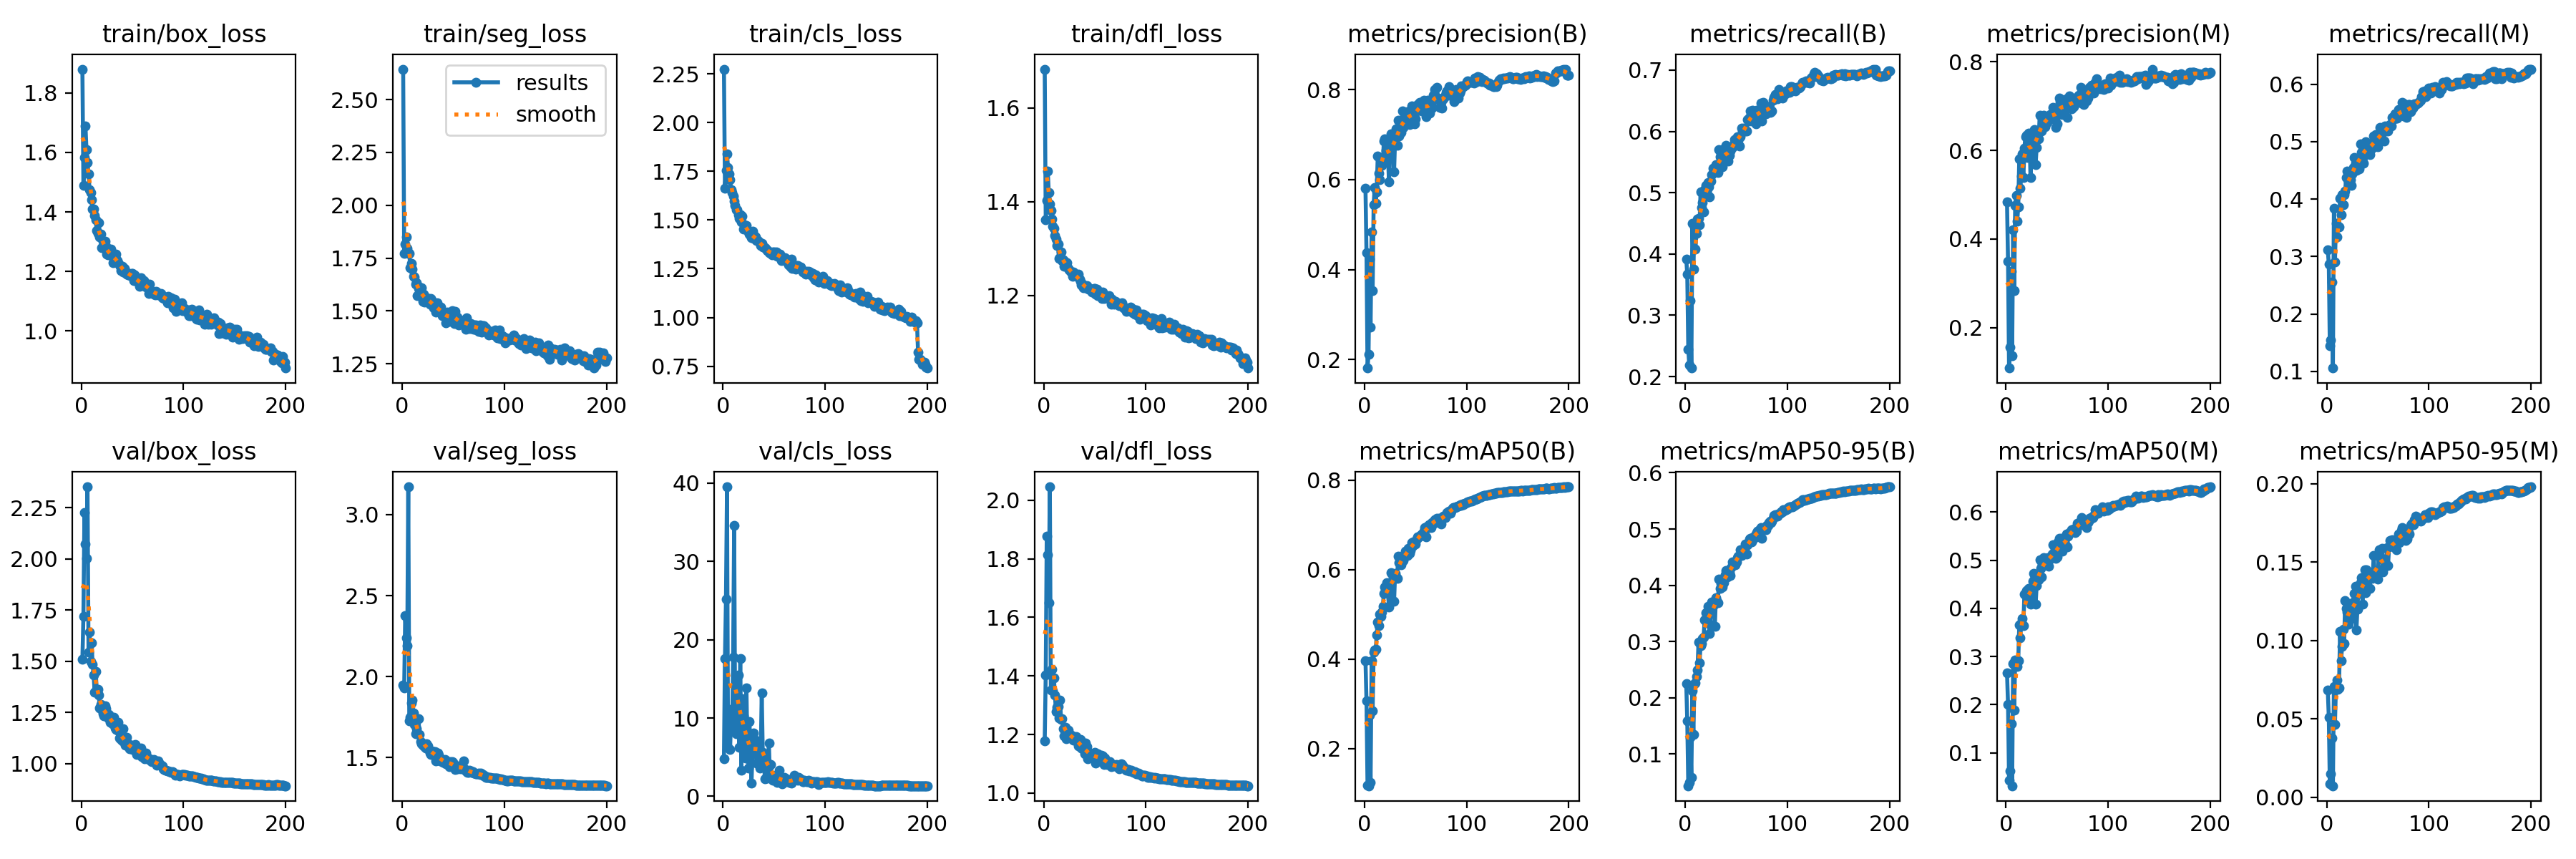

In [23]:
import cv2
from PIL import Image

img = Image.open('/kaggle/working/runs/segment/train2/results.png')
